In [25]:
import csv
from matplotlib import pyplot as plt

In [2]:
with open('courses.csv','r') as infile:
    data = list(csv.DictReader(infile))
print(len(data))

6850


In [8]:
data[1000]

{'limit': 'None',
 'enrolled': '1',
 'details': '',
 'type': 'section',
 'status_text': 'Open',
 'section': '28',
 'waiting': '0',
 'instructor': 'Amy Singer Amy Singer amysinger@brandeis.edu',
 'coinstructors': '',
 'code': "['HIST', '300E']",
 'subject': 'HIST',
 'coursenum': '300E',
 'name': 'Directed Research for PhD Students',
 'independent_study': 'True',
 'term': '1213',
 'description': '<p>Students will normally elect one research topic in the fall term and the spring of the first year. Each is designed to provide experience in designing, researching, and writing a substantial essay of a monographic character, based on extensive use of sources. Each is the equivalent of two full courses. Specific research topics are selected by the student in consultation with the adviser. Usually offered every year.<br />Staff</p>'}

In [15]:
[(d['name'],d['term'],d['enrolled']) for d in data if "Hickey" in d['instructor'] and d['independent_study']!= 'True']

[('Fundamentals of Software Engineering', '1221', '142'),
 ('Discrete Structures', '1213', '129'),
 ('Mobile Application Development', '1213', '101'),
 ('Mobile Application Development', '1222', '17'),
 ('Web Application Development', '1222', '19'),
 ('Introduction to Problem Solving in Python', '1223', '65'),
 ('Introduction to 3-D Animation', '1223', '125')]

In [16]:
def total_taught(instructor):
    return sum([int(d['enrolled']) for d in data if instructor in d['instructor']])
total_taught('Hickey')

629

In [17]:
teachers = {d['instructor'] for d in data}
print(len(teachers))

927


In [23]:
teaching_load = sorted([(total_taught(instr),instr) for instr in teachers],reverse=True)
teaching_load[:50]


[(2187, 'Leah Berkenwald Leah Berkenwald leahb@brandeis.edu'),
 (770, 'Bryan Ingoglia Bryan Ingoglia ingoglia@brandeis.edu'),
 (634, 'James Morris James Morris jmorris@brandeis.edu'),
 (629, 'Timothy Hickey Timothy Hickey tjhickey@brandeis.edu'),
 (560, 'Ahmad Namini Ahmad Namini anamini@brandeis.edu'),
 (557, 'Iraklis Tsekourakis Iraklis Tsekourakis tsekourakis@brandeis.edu'),
 (518, 'Maria Miara Maria Miara mmiara@brandeis.edu'),
 (510, 'Milos Dolnik Milos Dolnik dolnik@brandeis.edu'),
 (501,
  'Melissa Kosinski-Collins Melissa Kosinski-Collins kosinski@brandeis.edu'),
 (484, 'Rachel Woodruff Rachel Woodruff woodruff@brandeis.edu'),
 (482, 'unknown unknown unknown@brandeis.edu'),
 (470, 'Daniel Breen Daniel Breen dbreen91@brandeis.edu'),
 (447, 'Stephanie Murray Stephanie Murray murray@brandeis.edu'),
 (446, 'none none none@brandeis.edu'),
 (435, 'Peter Mistark Peter Mistark pmistark@brandeis.edu'),
 (431, 'Geoffrey Clarke Geoffrey Clarke geoffclarke@brandeis.edu'),
 (400, 'Claudia N

Text(0.5, 1.0, '847 faculty with teaching loads between 0 and 800')

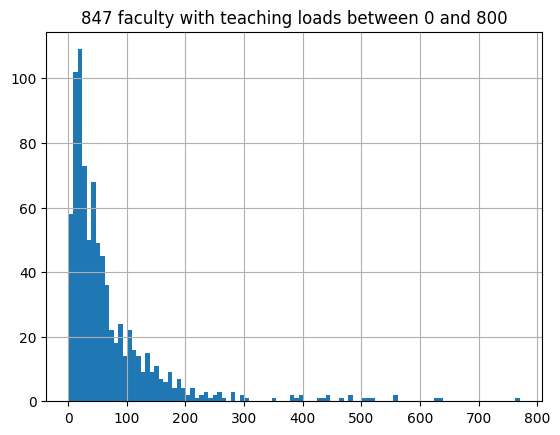

In [66]:
minn = 0
maxn = 800
loads = [x[0] for x in teaching_load if minn<x[0]<=maxn]
plt.hist(loads,bins=min(maxn,100))
plt.grid()
plt.title(str(len(loads))+" faculty with teaching loads between "+str(minn)+" and "+str(maxn))

In [69]:
[d['name'] for d in data if 'love' in d['description'].lower().split()]

['Latin America in Ethnographic Perspective',
 'Perfect Love?',
 'Indian Love Stories',
 'Sociology of Love',
 'Bollywood: Popular Film, Genre, and Society',
 'Eros and Desire in the English Renaissance']

In [77]:
def remove_punctuation(word):
    return("".join([w for w in word if w in "abcdefghijklmnopqrstuvwxyz"]))
remove_punctuation("('amazing\'s!!?)')")
def normalize(words):
    return [remove_punctuation(word.lower()) for word in words.split()]
            

In [87]:
[d['name'] for d in data if 'love' in normalize(d['name']+d['description'])]


['Latin America in Ethnographic Perspective',
 'Darwinian Dating: The Evolution of Human Attraction',
 'Perfect Love?',
 'Indian Love Stories',
 'Tracking the Digital Self',
 'Introduction to Italian Literature: Love, Intrigues and Politics from Dante to Goldoni',
 'Darwinian Dating: The Evolution of Human Attraction',
 'Darwinian Dating: The Evolution of Human Attraction',
 'Love, Sex, and Country: Films from India',
 'Love, Sex, and Power in Israeli Culture',
 'Russian Soul: Masterworks of Modern Russian Culture',
 'The Psychology of Love: Education for Close Relationships',
 'Media Stories: Circulating Love, Hate, Revolution',
 'Tracking the Digital Self',
 'Tracking the Digital Self',
 'Sociology of Love',
 'Darwinian Dating: The Evolution of Human Attraction',
 'Darwinian Dating: The Evolution of Human Attraction',
 'Bollywood: Popular Film, Genre, and Society',
 'Tracking the Digital Self',
 'Tracking the Digital Self',
 'Eros and Desire in the English Renaissance']

In [95]:
xx = sorted(data,key=lambda x: -int(x['enrolled']))
for d in xx[:30]:
    print(d['enrolled'],d['instructor'].split()[-1],d['name'],d['instructor'])
            

1065 leahb@brandeis.edu What Would Brandeis Do? Supporting Community Health and Safety Leah Berkenwald Leah Berkenwald leahb@brandeis.edu
979 leahb@brandeis.edu What Would Brandeis Do? Supporting Community Health and Safety Leah Berkenwald Leah Berkenwald leahb@brandeis.edu
202 jmorris@brandeis.edu Evolution and Biodiversity James Morris James Morris jmorris@brandeis.edu
194 murray@brandeis.edu Organic Chemistry I Stephanie Murray Stephanie Murray murray@brandeis.edu
180 anneberry@brandeis.edu Introduction to Psychology Anne Berry Anne Berry anneberry@brandeis.edu
175 jmorris@brandeis.edu Evolution and Biodiversity James Morris James Morris jmorris@brandeis.edu
172 ingoglia@brandeis.edu Organic Chemistry I Bryan Ingoglia Bryan Ingoglia ingoglia@brandeis.edu
172 jameshoward@brandeis.edu Introduction to Psychology James Howard James Howard jameshoward@brandeis.edu
170 mmiara@brandeis.edu Physiology Maria Miara Maria Miara mmiara@brandeis.edu
157 tmitch@brandeis.edu Introduction to Cognit